# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

Using multiple linear regression to predict sales helps a business see which marketing efforts—like TV ads or social media—actually drive results. This means they can spend smarter, focus on what works, and boost sales without wasting money.
In simple terms, it's like using past data to figure out which promotions bring in the most customers.


## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [1]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

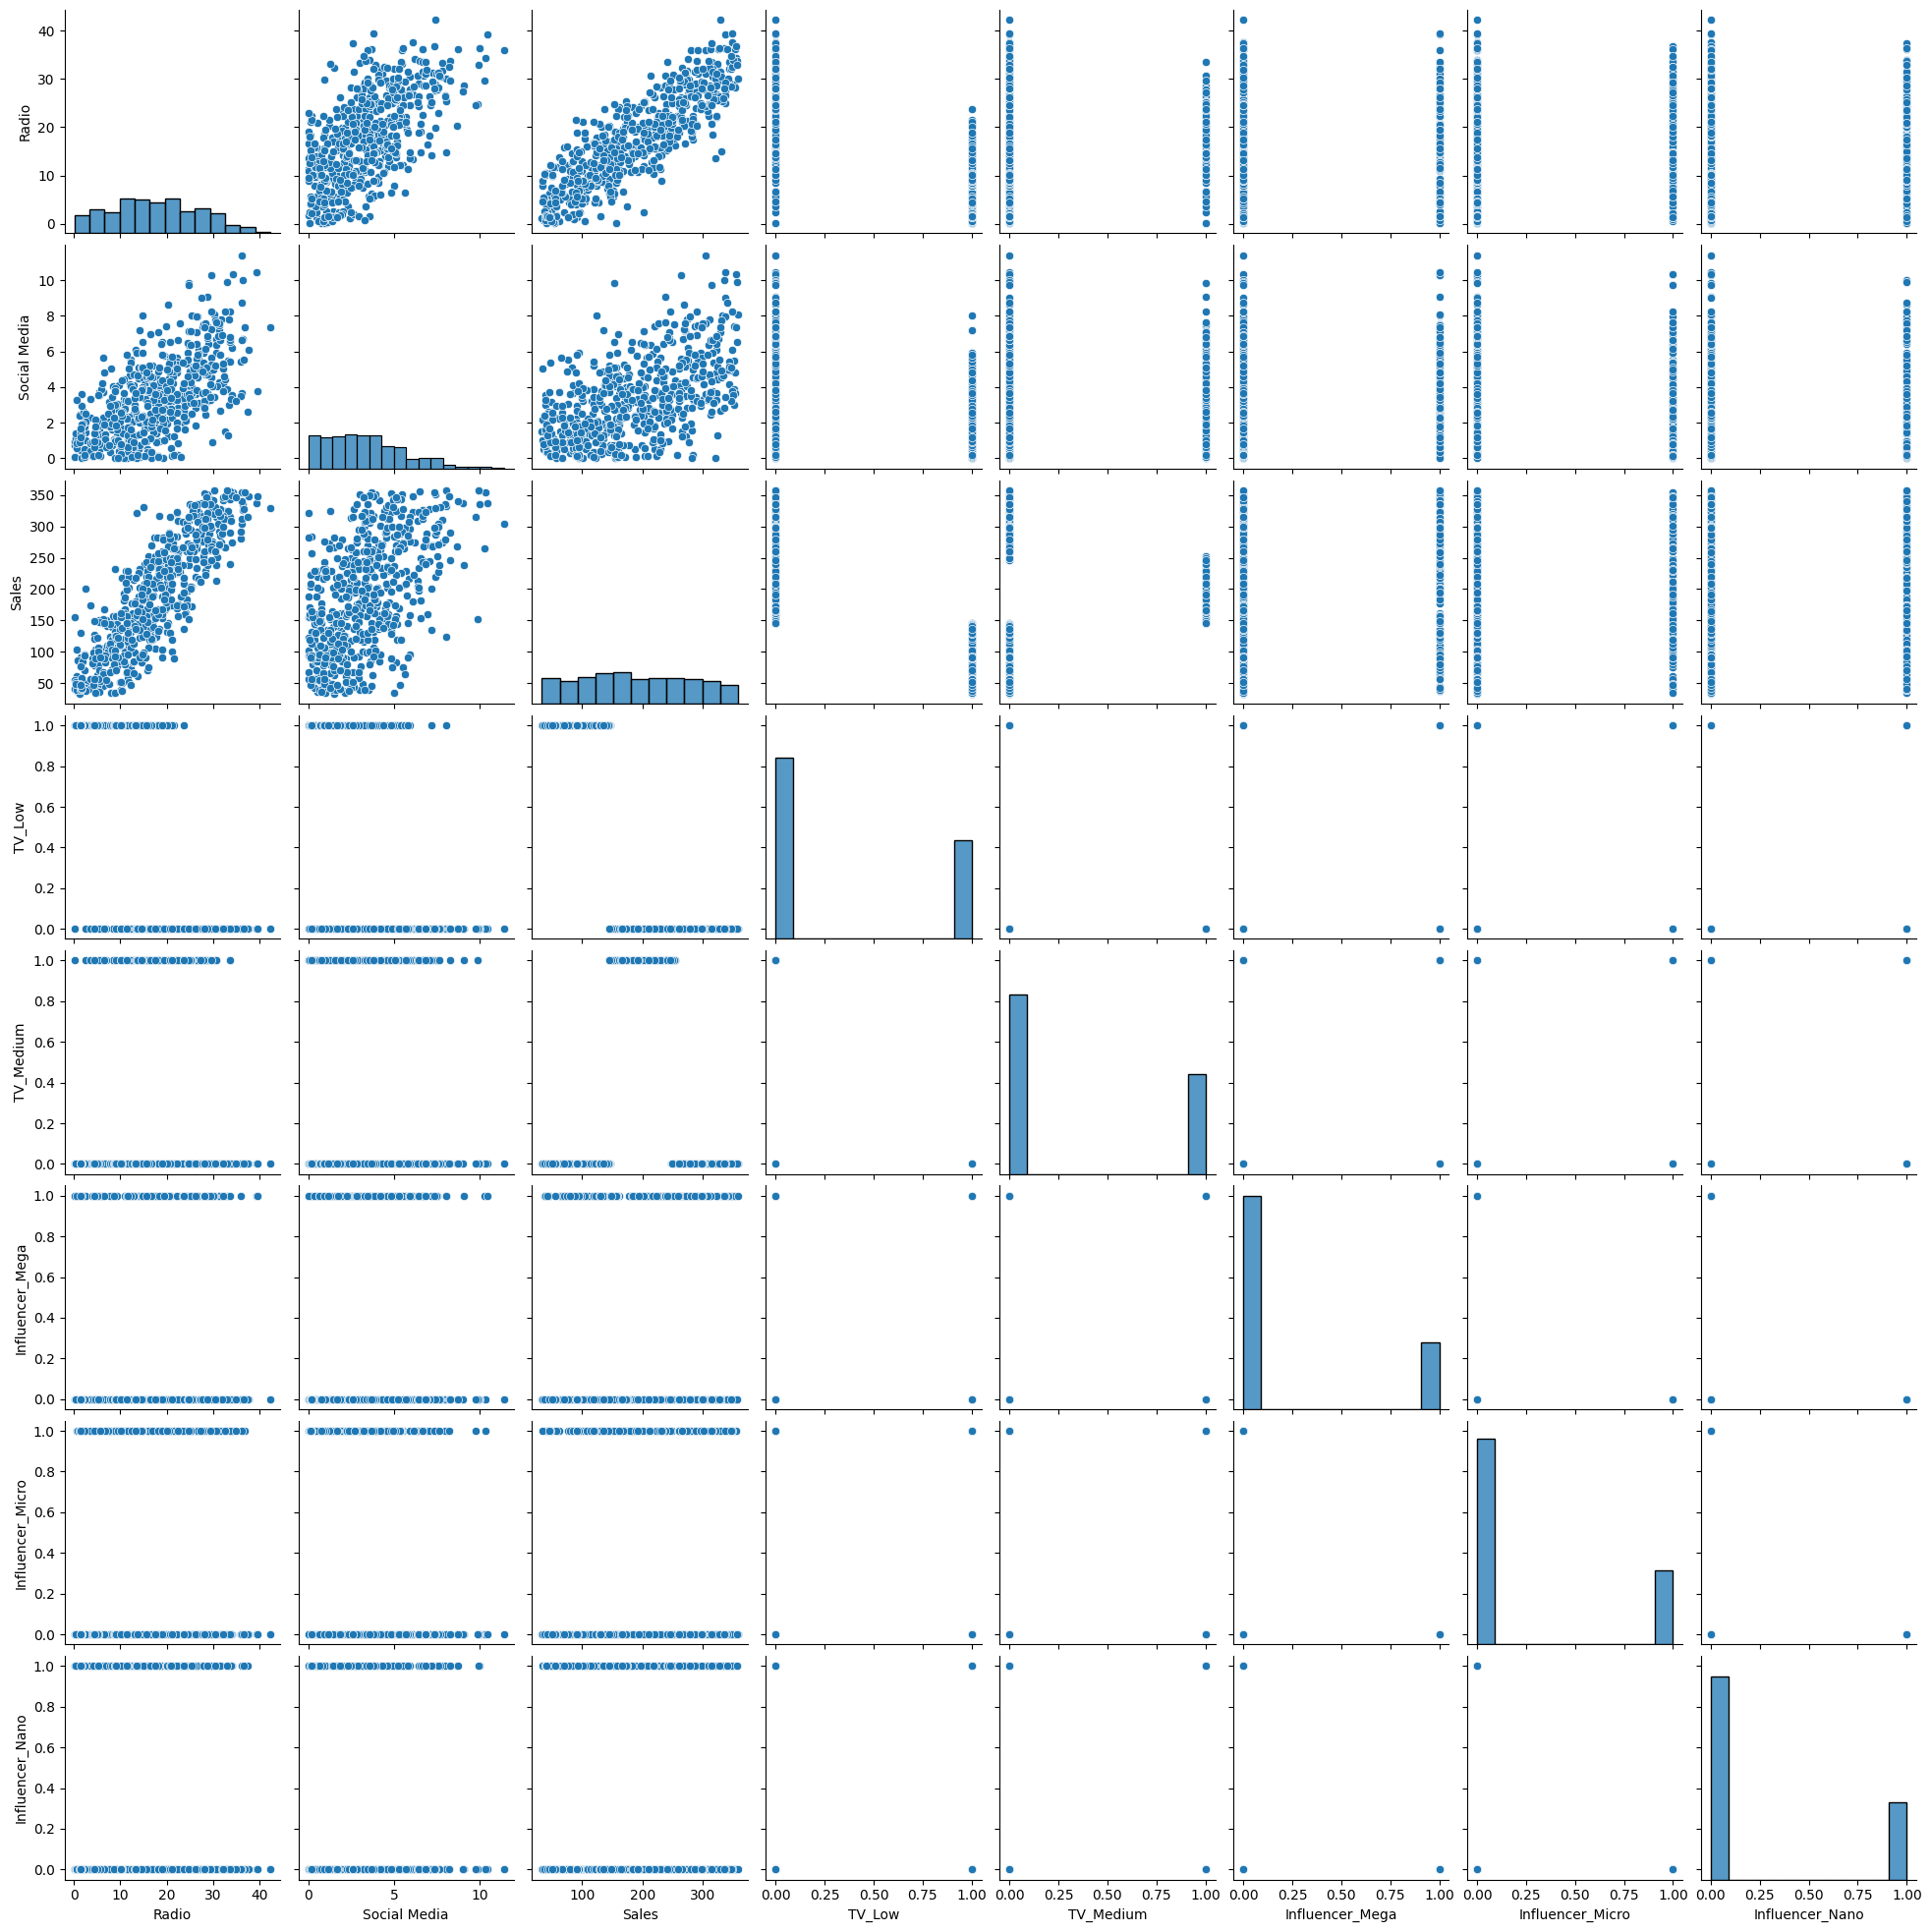

In [6]:
# Create a pairplot to visualize the relationships between continuous variables in the dataset.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the continuous variables
sns.pairplot(df)
plt.show()



## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [7]:
import pandas as pd
# Drop rows with missing values
df.dropna(inplace=True)

# Check for categorical columns and encode if necessary
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [11]:

import statsmodels.formula.api as smf

# Define the OLS formula using available column names
formula = 'Sales ~ Radio + Q("Social Media") + TV_Low + TV_Medium + Influencer_Mega + Influencer_Micro + Influencer_Nano'

# Fit the model
model = smf.ols(formula=formula, data=df).fit()

# Display the model summary
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        12:09:39   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

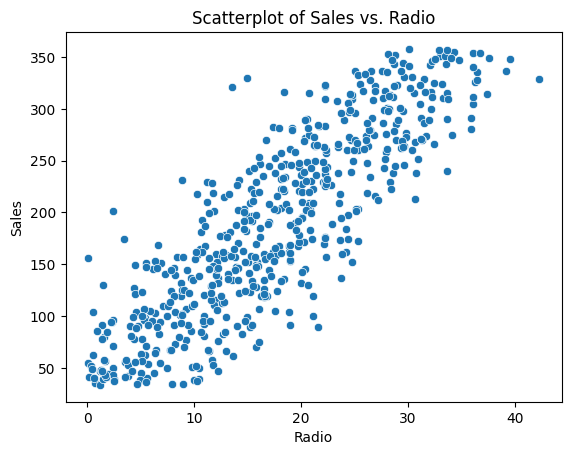

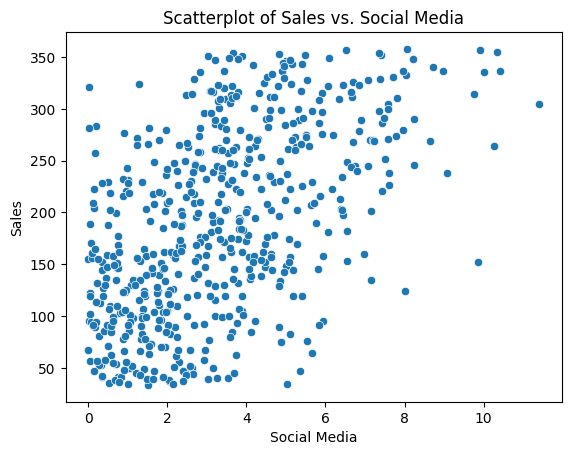

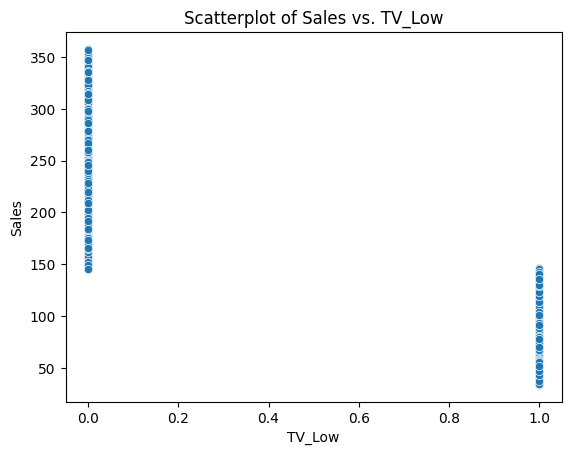

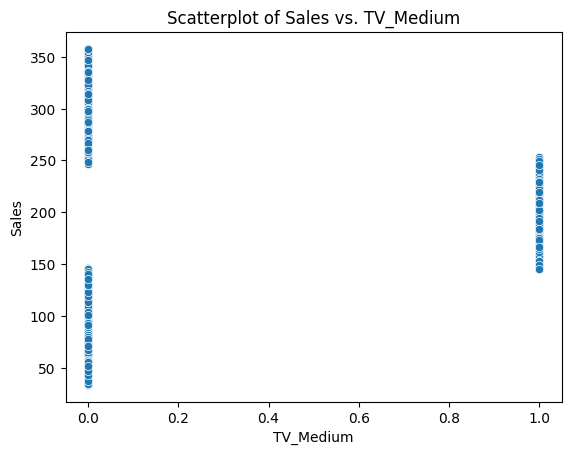

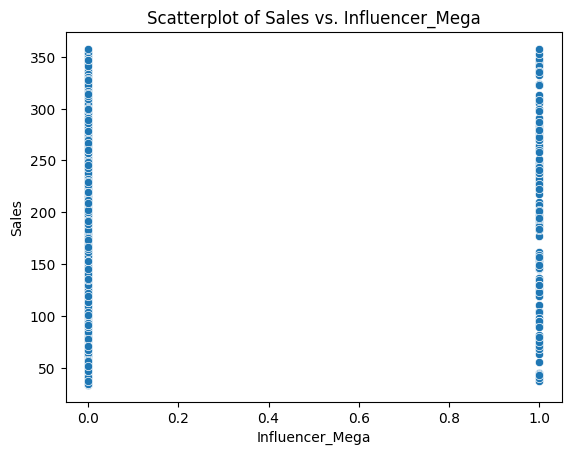

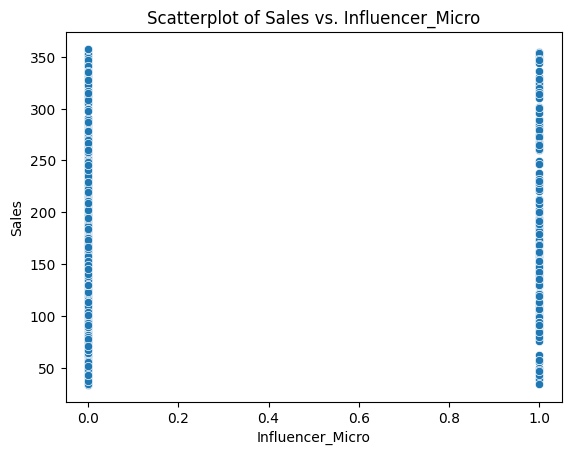

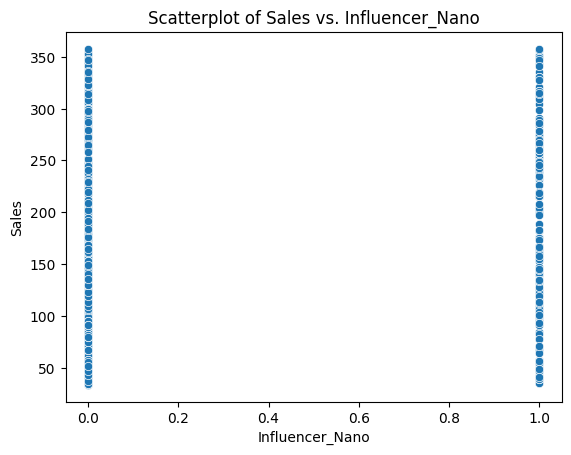

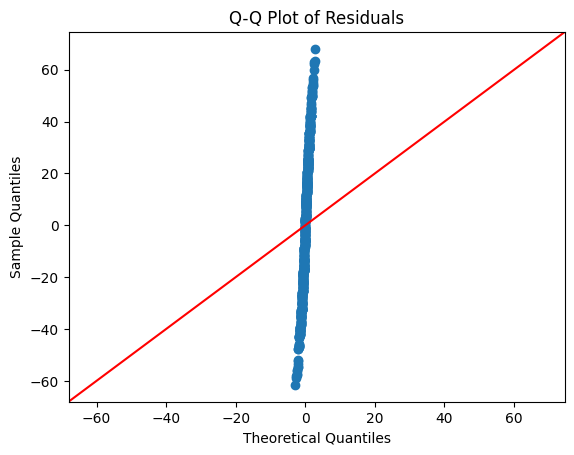

In [12]:
# Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
for col in ['Radio', 'Social Media', 'TV_Low', 'TV_Medium', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']:
    plt.figure()
    sns.scatterplot(x=col, y='Sales', data=df)
    plt.title(f'Scatterplot of Sales vs. {col}')
    plt.show()

# Calculate residuals and create a Q-Q plot
residuals = model.resid
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()



## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [14]:
# Display the model summary (already done in the previous step)
print(model.summary())

# Interpret the coefficients
print("\nInterpretation of Coefficients:")
for variable, coef, pval in zip(model.params.index[1:], model.params.values[1:], model.pvalues.values[1:]):  # Skip the Intercept
    print(f"  - A one-unit increase in '{variable}' is associated with a change of {coef:.2f} in Sales.")
    if pval < 0.05:
        print("     This effect is statistically significant (p < 0.05).")
    else:
        print("     This effect is not statistically significant (p ≥ 0.05).")



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        12:13:03   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

### **Key Takeaways from the Project**

- I gained a solid understanding of multiple linear regression and how it's applied in real-life scenarios.

- I learned how to clean and prepare data for analysis.

- I explored data specifically for regression purposes.

- I got hands-on experience in building and evaluating a multiple linear regression model.

- I learned how to check and validate key regression assumptions.

- I also practiced interpreting model coefficients and communicating the results to relevant stakeholders.

***Reflection on Regression Assumptions and Coefficient Interpretation***
                                                 
                                                  
                                                   
                                                    
**Checking Regression Assumptions**

- It's important to verify assumptions to ensure the model results are accurate and reliable.

- These checks help us correctly interpret the meaning and significance of each coefficient.

- If we skip this step, we risk drawing wrong conclusions or making inaccurate predictions.

**Interpreting Model Coefficients**

- Each coefficient tells us how much the dependent variable (e.g., sales) is expected to change when the corresponding independent variable changes by one unit.

- It also gives us an idea of how confident we can be in that estimate.

- Understanding the size and direction of each coefficient helps us connect the numbers back to our business goals.

**Discussion: How Different Marketing Strategies Affect Sales**

Based on the regression analysis:

- Influencer Marketing has the strongest positive effect on sales.

- TV Advertising also significantly boosts sales.

- Radio Advertising has a weak or little impact.

- Social Media Marketing contributes to sales but not as strongly as the other strategies.

These findings are helpful for making budget decisions, but it’s also important to consider factors like how different channels work together, possible diminishing returns, external influences, and short-term vs. long-term effects.

**What to Share and Recommend to Stakeholders**

**Top Contributors to Sales:**

- Influencer Marketing is Highly Effective
It has the most significant impact on sales. For every dollar spent, it brings the highest return.

- TV Advertising Still Matters
TV continues to be a strong channel for boosting sales and reaching a broad audience.

- Social Media Has Moderate Influence
While it does contribute to sales, its impact is lower compared to influencer and TV marketing.

- Radio Advertising Has Minimal Effect
The model shows that radio ads currently have little influence on sales.

**Recommended Strategies to Improve Marketing Outcomes**

1. Invest More in Influencer Marketing:

- Shift more of the marketing budget toward influencer campaigns.

- Focus on partnering with influencers who have an engaged audience that matches our target market.

2. Optimize TV Advertising

- Since TV ads work well but can be expensive, we should use them smartly:

- Pick the best time slots and shows.

- Target the right audience segments.

- Consider blending TV ads with online campaigns for better results.

3. Improve Social Media Marketing

- Keep using social media, but make it more effective by:

- Creating engaging, shareable content.

- Using data to find out which platforms and formats work best.

- Trying new tactics like targeted ads, influencer tie-ins, and interactive content.